In [1]:
%load_ext autoreload
%autoreload 2
from ml_tools import *


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random

from xgboost import plot_importance
from xgboost import XGBRegressor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

/home/erichschulman/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


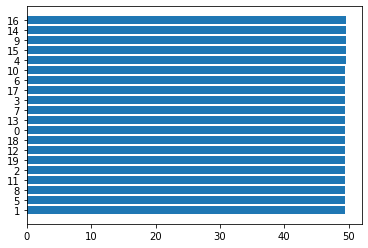

1     49.407586
5     49.431244
8     49.432588
11    49.446508
2     49.447168
19    49.449685
12    49.462337
18    49.478025
0     49.486327
13    49.495774
7     49.496976
3     49.498315
17    49.498505
6     49.501946
10    49.511615
4     49.516373
15    49.517995
9     49.534598
14    49.535141
16    49.560991
Name: score, dtype: float64
alpha_value: 500
24466.590408014534 0.5043864608885986
24316.3107909163 0.49315821378739644


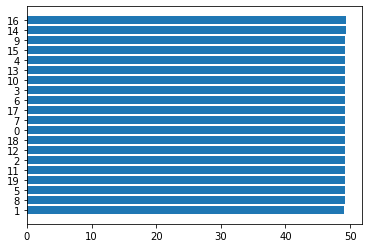

1     49.119687
8     49.149702
5     49.158885
19    49.166541
11    49.169994
2     49.174178
12    49.191977
18    49.205806
0     49.218321
7     49.235717
17    49.239515
6     49.242907
3     49.244382
10    49.253413
13    49.255821
4     49.269939
15    49.285245
9     49.285924
14    49.302400
16    49.334670
Name: score, dtype: float64
alpha_value: 750
24469.90654646625 0.5043192730538335
24319.401008337158 0.49309380223537935


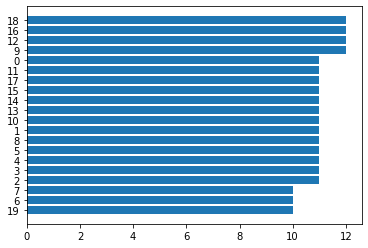

18    18
16    16
12    12
9      9
0      0
11    11
17    17
15    15
14    14
13    13
10    10
1      1
8      8
5      5
4      4
3      3
2      2
7      7
6      6
19    19
Name: features, dtype: object
27586.609129049448 0.4411825289306245
27378.863505372716 0.4332643968746177


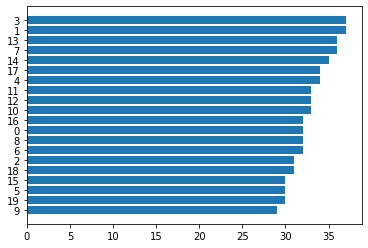

3      3
1      1
13    13
7      7
14    14
17    17
4      4
11    11
12    12
10    10
16    16
0      0
8      8
6      6
2      2
18    18
15    15
5      5
19    19
9      9
Name: features, dtype: object
28206.027671201784 0.42861433064273086
27901.730535854465 0.42185595527529207


In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m, num_relevant_cov):
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    y = (x_1.sum(axis=1) * m) + e
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,200,50,20)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [500,750]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

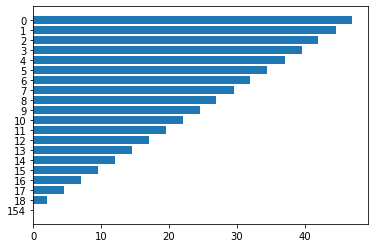

154     0.000000
18      1.949628
17      4.490250
16      7.009564
15      9.529492
14     12.020445
13     14.527095
12     17.015738
11     19.505505
10     21.987320
9      24.539922
8      26.973164
7      29.523759
6      31.967406
5      34.439078
4      37.060180
3      39.540711
2      41.991760
1      44.549853
0      46.959920
Name: score, dtype: float64
alpha_value: 500
7658.225661763159 0.5078743910018252
7758.067315968859 0.5063221977540079


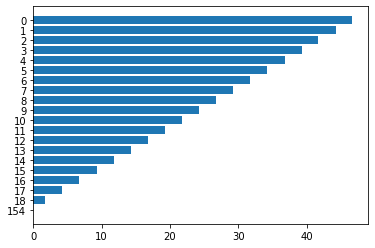

154     0.000000
18      1.684875
17      4.236362
16      6.757211
15      9.295128
14     11.776116
13     14.283300
12     16.778346
11     19.261741
10     21.736485
9      24.312530
8      26.722500
7      29.286078
6      31.687900
5      34.165662
4      36.828088
3      39.301200
2      41.733264
1      44.321794
0      46.682145
Name: score, dtype: float64
alpha_value: 750
7661.2221456255475 0.5076818621355745
7761.026953895048 0.5061125050195387


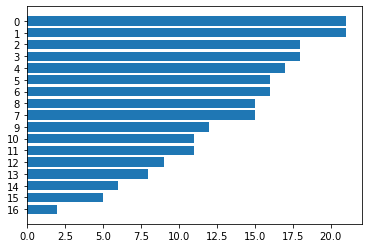

0      0
1      1
2      2
3      3
4      4
5      5
6      6
8      8
7      7
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
Name: features, dtype: object
8215.609614400915 0.4720238911049103
8271.705462090626 0.4703579976011184


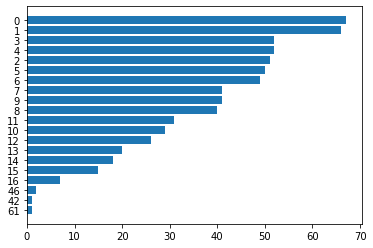

0      0
1      1
3      3
4      4
2      2
5      5
6      6
7      7
9      9
8      8
11    11
10    10
12    12
13    13
14    14
15    15
16    16
18    46
17    42
19    61
Name: features, dtype: object
8345.675299408867 0.4636865482909089
8361.74836170114 0.46171983490678903


In [3]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m, num_relevant_cov):
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    m = np.arange(num_relevant_cov)[::-1]*m/num_relevant_cov
    y = (x_1 * m).sum(axis=1) + e
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,200,50,20)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [500,750]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

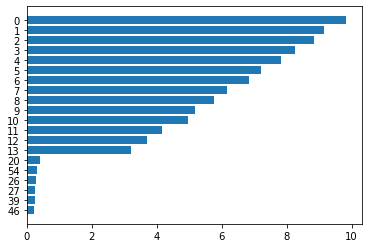

46    0.231600
39    0.249947
27    0.250946
26    0.264740
54    0.294875
20    0.410870
13    3.200085
12    3.691941
11    4.151440
10    4.963919
9     5.174209
8     5.753021
7     6.172665
6     6.845641
5     7.216655
4     7.839543
3     8.267186
2     8.837712
1     9.149186
0     9.824465
Name: score, dtype: float64
alpha_value: 750
2562.2709009008 0.5043279895614239
2577.9032999854535 0.5153609882853863


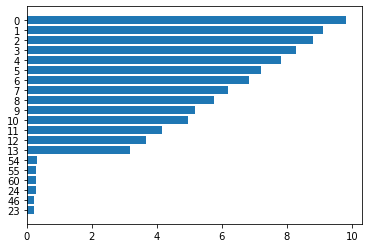

23    0.203766
46    0.212215
24    0.272459
60    0.274476
55    0.280412
54    0.296548
13    3.186378
12    3.677920
11    4.160551
10    4.941747
9     5.186383
8     5.751387
7     6.177330
6     6.840840
5     7.211393
4     7.820303
3     8.271706
2     8.810554
1     9.125237
0     9.812907
Name: score, dtype: float64
alpha_value: 1000
2563.1213688272505 0.5041620867903913
2578.5748808980875 0.5152817096013691


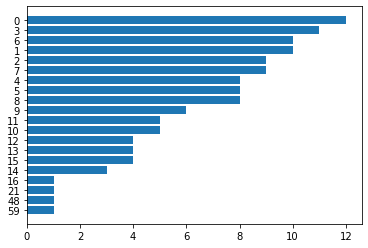

0      0
3      3
6      6
1      1
2      2
7      7
4      4
5      5
8      8
9      9
11    11
10    10
12    12
13    13
15    15
14    14
16    16
17    21
18    48
19    59
Name: features, dtype: object
2622.988979670604 0.49259262614900745
2650.0191641513247 0.5018735933406986


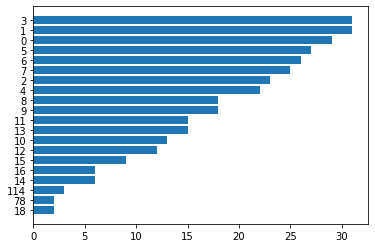

3       3
1       1
0       0
5       5
6       6
7       7
2       2
4       4
8       8
9       9
11     11
13     13
10     10
12     12
15     15
16     16
14     14
44    114
33     78
18     18
Name: features, dtype: object
2611.145906963432 0.494881198665963
2630.1599229786625 0.505787229813583


In [4]:
#add correlation with certain covariates 

def gen_data(nobs, num_cov, m, num_relevant_cov, num_latent):
    #each relevant cov is generates num_cov more...
    
    #only the first n of each is relevant...
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    x_3 = np.random.normal(scale=1., size=(nobs, num_latent))
    
    #add in the latent variable
    tile_1 = np.tile(x_3,int(num_relevant_cov/num_latent))
    tile_2 = np.tile(x_3,int(num_cov/num_latent))
    x_1  = x_1 + tile_1
    x_2 = x_2 + tile_2
    
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    m = np.arange(num_relevant_cov)[::-1]*m/num_relevant_cov
    y = (x_1 * m).sum(axis=1) + e
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,100,10,20,2)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [750,1000]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


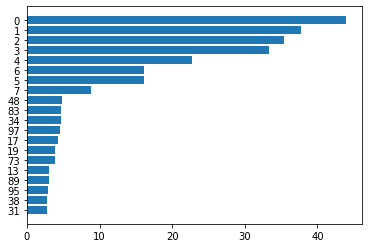

31     2.791807
38     2.816872
95     2.915980
89     3.027504
13     3.088068
73     3.819571
19     3.930182
17     4.314668
97     4.618473
34     4.736102
83     4.747673
48     4.786363
7      8.838768
5     16.102425
6     16.109184
4     22.789073
3     33.372600
2     35.368896
1     37.783950
0     43.898385
Name: score, dtype: float64
alpha_value: 750
20232.456563353244 0.13983864495018775
20363.333107554266 0.14361686506762195


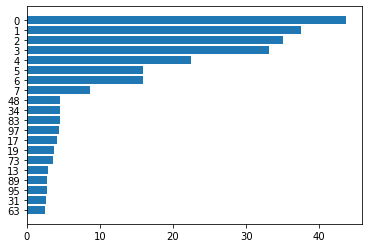

63     2.537202
31     2.540223
95     2.676311
89     2.789645
13     2.897410
73     3.597228
19     3.704836
17     4.093865
97     4.414311
83     4.481483
34     4.490435
48     4.560334
7      8.603739
6     15.856859
5     15.903115
4     22.498177
3     33.108110
2     35.054413
1     37.546070
0     43.639071
Name: score, dtype: float64
alpha_value: 1000
20199.143758703216 0.14126390303868241
20354.407241754332 0.14513243247973961


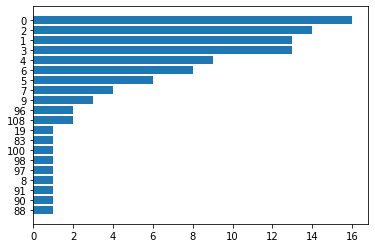

0       0
2       2
1       1
3       3
4       4
6       6
5       5
7       7
9       9
27     96
31    108
11     19
22     83
30    100
29     98
28     97
8       8
26     91
25     90
24     88
Name: features, dtype: object
20398.20771244392 0.13288783350851013
20462.38816310433 0.13475350809053932


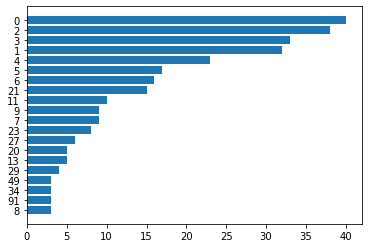

0      0
2      2
3      3
1      1
4      4
5      5
6      6
18    21
10    11
9      9
7      7
19    23
21    27
17    20
12    13
22    29
33    49
26    34
47    91
8      8
Name: features, dtype: object
20031.660256184685 0.1485267447919057
19913.474149055764 0.14730850608683244


In [6]:
%load_ext autoreload
%autoreload 2
from ml_tools import *


#add in interaction terms

def gen_data(nobs, num_cov, m, num_relevant_cov,num_latent):
    #each relevant cov is generates num_cov more...
    
    #only the first n of each is relevant...
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    #create all interations between x1 and x3
    x_1_interact = np.zeros((nobs,num_relevant_cov*num_latent))
    for i in range(num_relevant_cov):
        for j in range(num_latent):
            x_1_interact[:,i*j] = x_1[:,i]*x_2[:,j]
    
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    
    m_coef = np.arange(num_relevant_cov)[::-1]*m/num_relevant_cov
    #m_tile = 2*m*np.ones(num_relevant_cov*num_latent) 
    m_tile = np.tile(m_coef,num_latent)/2
    y = (x_1 * m_coef).sum(axis=1) + (x_1_interact * m_tile).sum(axis=1) + e
    
    
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,100,50,10,20)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [750,1000]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)